In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [3]:
# Data Loading

admissions = pd.read_csv('Admissions.csv')


#Removing "Unnamed" columns 
admissions= admissions[['admit', 'gre', 'gpa', 'rank']]

print ("Clean Size admissions", admissions.shape)

print("Type", type(admissions))

admissions.head()

Clean Size admissions (400, 4)
Type <class 'pandas.core.frame.DataFrame'>


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
# Cheking NaN /null values
admissions.isnull().sum()*100/admissions.shape[0]


admit    0.0
gre      0.0
gpa      0.0
rank     0.0
dtype: float64

In [5]:
admissions.describe()  # Only numerical variables are presented

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
print(admissions.columns)


Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


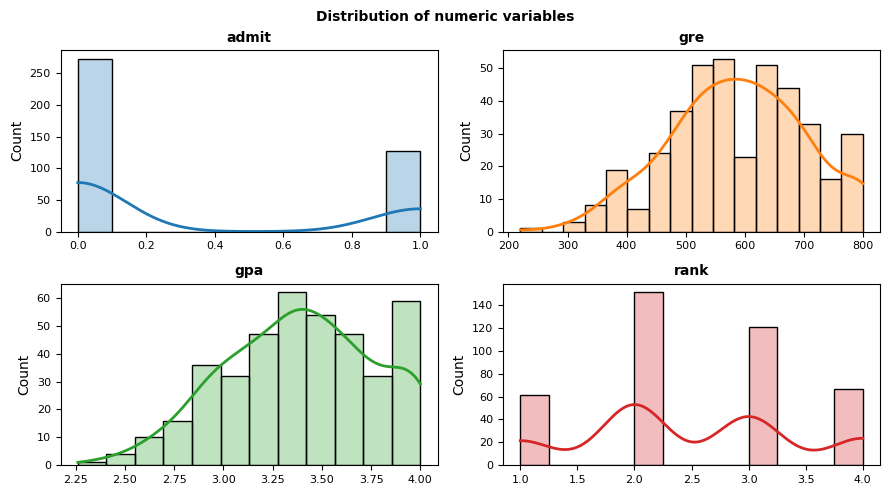

In [7]:
# Distribution of each variable
# ==============================================================================
# Fit number of subplots to the number of columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
#col_numeric = admissions.select_dtypes(include=['float64', 'int']).columns # when only numeric coluns are selected

col_numeric = admissions.columns

for i, colum in enumerate(col_numeric):
    sns.histplot(
        data    = admissions,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numeric variables', fontsize = 10, fontweight = "bold");

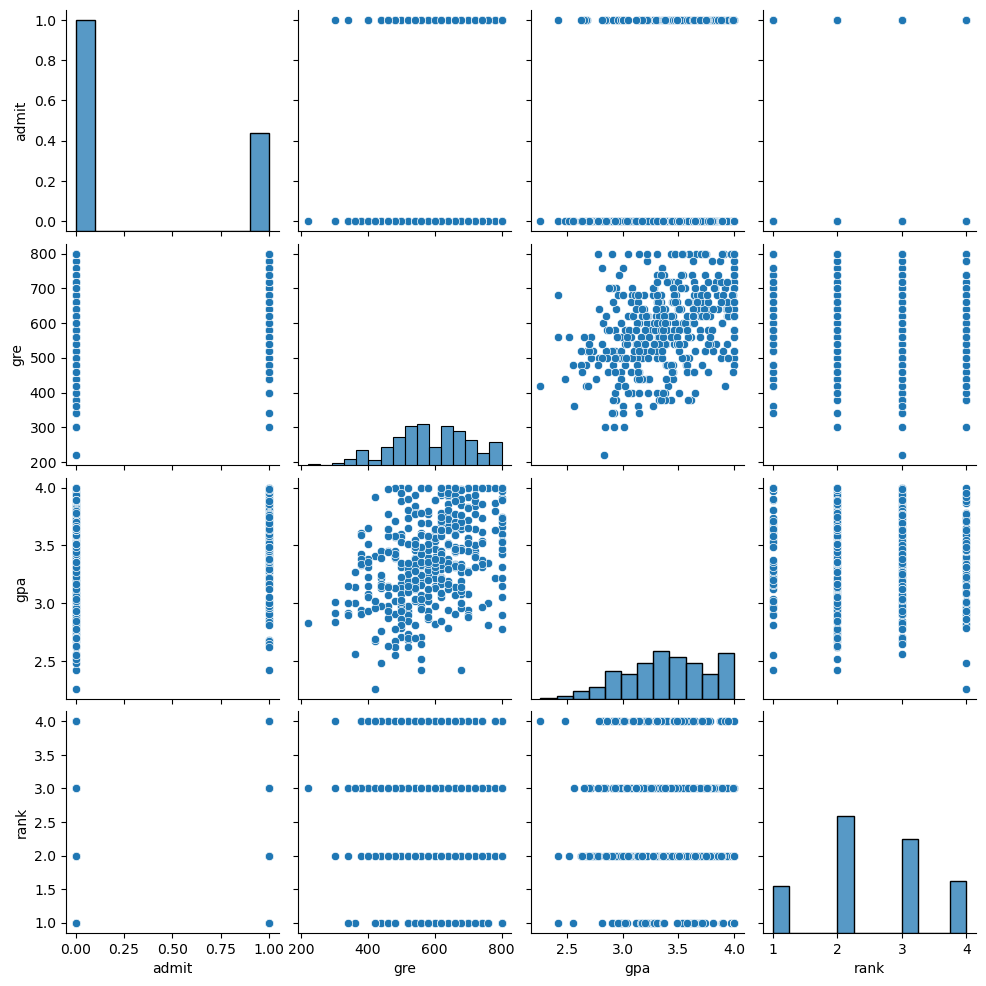

In [8]:
# plot numerical data as pairs
sns.pairplot(admissions);

In [9]:
# count of each category value
print(admissions["rank"].value_counts())


rankd = pd.Series(list(admissions['rank']))

rankd=pd.get_dummies(rankd, drop_first=True)  # drop_first removes 0 values leaving k-1 levels

# Alternative way keeping the whole dataframe
#rankd=pd.get_dummies(salaries, columns=['sex','rank'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels

print("\n \n",rankd)

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

 
      2  3  4
0    0  1  0
1    0  1  0
2    0  0  0
3    0  0  1
4    0  0  1
..  .. .. ..
395  1  0  0
396  0  1  0
397  1  0  0
398  1  0  0
399  0  1  0

[400 rows x 3 columns]


In [10]:
# Creation of dummines for the variable rank
data=pd.get_dummies(admissions, columns=['rank'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels

data.head()


,admit,gre,gpa,dmy_2,dmy_3,dmy_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [11]:
import statsmodels.formula.api as sm


# Fit the logidstic resgression line using ‘logit’
model = sm.logit("admit ~  gre + gpa + dmy_2 + dmy_3+ dmy_4", data=data).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.08292
Time:                        17:06:31   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.

In [12]:
#Explanation of some of the terms in the summary table:

#coef : the coefficients of the independent variables in the regression equation.
#Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
#LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
#Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

# Null deviance is lL-nul *2 = 249,99*2= 499.98
# Residual deviance is log-Likelihood *2 = 229,26*2= 458.52

#Difference in deviance of the models without and with predictors
#    LL-Null - Log-Likehood = 20,73
#  In R 20,73*2 = 41,46

# p value LLR p-value very low 

# Conclusion: this confirms that the model as a whole fits 
# significantly better than an empty model


In [13]:
# Obtaining the coefficients of the model 
coeff=model.params

print(coeff)

Intercept   -3.989979
gre          0.002264
gpa          0.804038
dmy_2       -0.675443
dmy_3       -1.340204
dmy_4       -1.551464
dtype: float64


In [14]:
# Obtaining the certainty of the coefficients of the model 
coeff_conf=model.conf_int(0.025)

print(coeff_conf)

                  0         1
Intercept -6.545068 -1.434890
gre       -0.000188  0.004717
gpa        0.060297  1.547778
dmy_2     -1.384824  0.033938
dmy_3     -2.114175 -0.566233
dmy_4     -2.487993 -0.614935


In [15]:
model.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[12.250925446015742]]   0.0004650274670277254              1
gre         [[4.284334775711042]]     0.03846513184816319              1
gpa         [[5.871504049801814]]    0.015387899401489723              1
dmy_2      [[4.5546840611325266]]     0.03282882008879941              1
dmy_3       [[15.06372751498201]]  0.00010394154055980098              1
dmy_4      [[13.787343085769194]]  0.00020471071831686845              1

In [16]:
# Obtaining Standard error 
SE=model.bse

print("standard error \n\n",SE)

standard error 

 Intercept    1.139951
gre          0.001094
gpa          0.331819
dmy_2        0.316490
dmy_3        0.345306
dmy_4        0.417832
dtype: float64


In [17]:
# Akaike criteria
model.aic

470.51749247589896

In [18]:
# Extracting tables from summary
fit_summary1 = model.summary().tables[0]
#fit_summary.as_html()
print(fit_summary1)

fit_summary2 = model.summary().tables[1]
print(fit_summary2)

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.08292
Time:                        17:06:32   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.0

In [19]:
# Calculating Odd-ratios

# ... Define and fit model
odds_ratios = pd.DataFrame(
    {
        "Odd Ratio": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

           Odd Ratio  Lower CI  Upper CI
Intercept   0.018500  0.001981  0.172783
gre         1.002267  1.000120  1.004418
gpa         2.234545  1.166122  4.281877
dmy_2       0.508931  0.273692  0.946358
dmy_3       0.261792  0.133055  0.515089
dmy_4       0.211938  0.093443  0.480692


In [20]:
# Creation of a new data frame with mean values for gre and gpa

gre_m=admissions['gre'].mean()  # mean value 
gpa_m=admissions['gpa'].mean()  #mean value

print(" mean values gre and gpa", gre_m, gpa_m)

# Configuration of a new datasey
new_data = {
            'gre' :  [gre_m, gre_m, gre_m, gre_m],
            'gpa' : [gpa_m, gpa_m, gpa_m, gpa_m],
            'rank': [1, 2, 3, 4]
}

print(new_data)

#Conversion to dataframe
new_df = pd.DataFrame(new_data)
new_df

#Creation of dummies
test=pd.get_dummies(new_df, columns=['rank'], prefix='dmy',drop_first=True)  # drop_first removes 0 values leaving k-1 levels

test


 mean values gre and gpa 587.7 3.3899
{'gre': [587.7, 587.7, 587.7, 587.7], 'gpa': [3.3899, 3.3899, 3.3899, 3.3899], 'rank': [1, 2, 3, 4]}


,gre,gpa,dmy_2,dmy_3,dmy_4
0,587.7,3.3899,0,0,0
1,587.7,3.3899,1,0,0
2,587.7,3.3899,0,1,0
3,587.7,3.3899,0,0,1


In [21]:
# performing predictions on the test datdaset
yhat = model.predict(exog=test)

print("Predictions obtained \n", yhat)

#prediction = list(map(round, yhat)) #Rounding the predictions as an alternative to the next lines

# Predicted classification
# ==============================================================================
classification = np.where(yhat <0.5, 0, 1)
classification

print(" \n Classification    ", classification)

test['Probability']=yhat
test['Classification']=classification
test


Predictions obtained 
 0    0.516602
1    0.352285
2    0.218612
3    0.184668
dtype: float64
 
 Classification     [1 0 0 0]


,gre,gpa,dmy_2,dmy_3,dmy_4,Probability,Classification
0,587.7,3.3899,0,0,0,0.516602,1
1,587.7,3.3899,1,0,0,0.352285,0
2,587.7,3.3899,0,1,0,0.218612,0
3,587.7,3.3899,0,0,1,0.184668,0


In [22]:
# Complete Analysis using training and test datasets
# División de los datos en train y test
# ==============================================================================
X = data.drop(columns = 'admit')
y = data['admit']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train.head()


,gre,gpa,dmy_2,dmy_3,dmy_4
33,800,4.00,0,1,0
253,540,3.55,0,0,1
118,800,3.70,0,0,0
300,640,3.30,1,0,0
115,620,3.99,0,1,0


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model creation
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
model = sm.Logit(endog=y_train, exog=X_train,)
model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.601202
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  320
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.07416
Time:                        17:06:32   Log-Likelihood:                -192.38
converged:                       True   LL-Null:                       -207.80
Covariance Type:            nonrobust   LLR p-value:                 1.016e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9074      1.213     -2.396      0.017      -5.285      -0.530
gre            0.0023      0.

In [24]:
#simplyfing the model
# Complete Analysis using training and test datasets
# División de los datos en train y test
# ==============================================================================
X = data.drop(columns = ['gpa', 'admit'])
y = data['admit']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train.head()

,gre,dmy_2,dmy_3,dmy_4
33,800,0,1,0
253,540,0,0,1
118,800,0,0,0
300,640,1,0,0
115,620,0,1,0


In [25]:

#  New Model creation
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
model = sm.Logit(endog=y_train, exog=X_train,)
model = model.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.604604
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  320
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.06892
Time:                        17:06:32   Log-Likelihood:                -193.47
converged:                       True   LL-Null:                       -207.80
Covariance Type:            nonrobust   LLR p-value:                 9.235e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4921      0.723     -2.063      0.039      -2.909      -0.075
gre            0.0030      0.

In [26]:
# performing predictions on the training dataset
# ==============================================================================

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
predict_train = model.predict(exog = X_train)
clas_train = np.where(predict_train < 0.4, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 66.5625%


In [27]:
# Confusion matrix for training
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_train.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,160,47
1,60,53


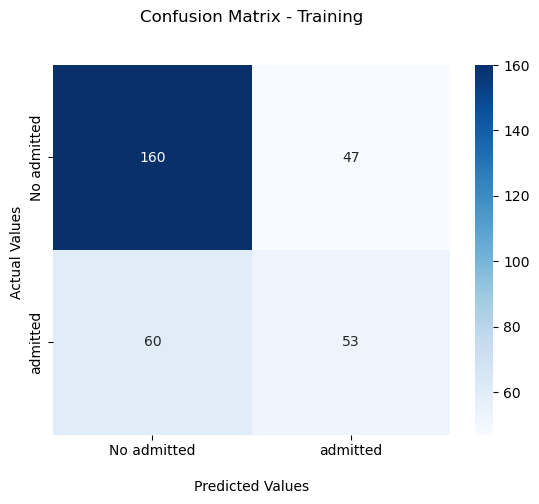

In [28]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix - Training\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No admitted','admitted'])
ax.yaxis.set_ticklabels(['No admitted','admitted'])

## Display the visualization of the Confusion Matrix.
plt.show()

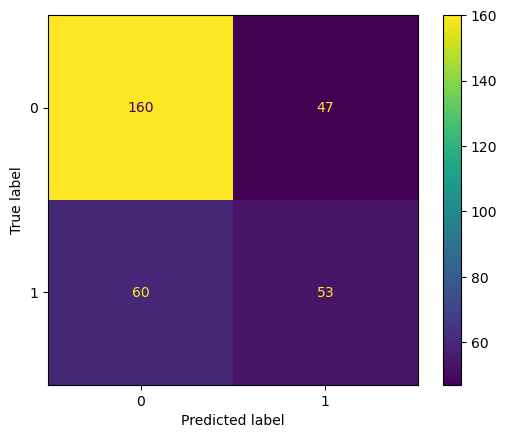

In [29]:
#Plotting Confusion matrix - Another option

from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_train, clas_train)

ax.set_title('\n Confusion Matrix - Training\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


In [30]:
# performing predictions on the test dataset
# ==============================================================================

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predict_test = model.predict(exog = X_test)
clas_test = np.where(predict_test < 0.4, 0, 1)  # 0.4 can be changed

# Accuracy in test 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clas_test,
            normalize = True
           )
print("")
print(f" Accuracy in test is: {100*accuracy}%")


 Accuracy in test is: 73.75%


In [31]:
# Confusion matrix for tesy
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clas_test,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,54,12
1,9,5


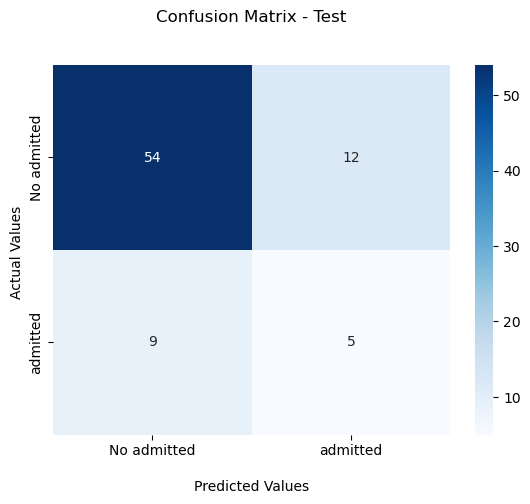

In [32]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix - Test\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No admitted','admitted'])
ax.yaxis.set_ticklabels(['No admitted','admitted'])

## Display the visualization of the Confusion Matrix.
plt.show()

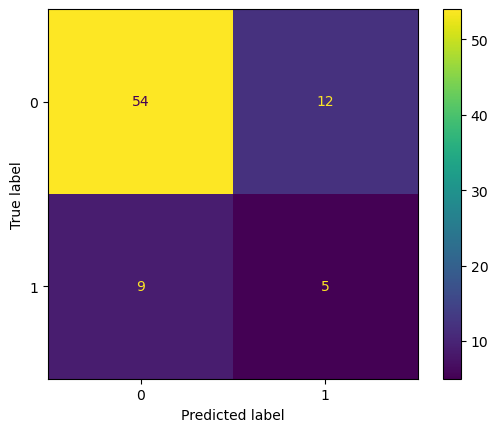

In [33]:
#Plotting Confusion matrix - Another option

#from sklearn import metrics

metrics.ConfusionMatrixDisplay.from_predictions(y_test, clas_test)

In [34]:
#Libraries required for ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


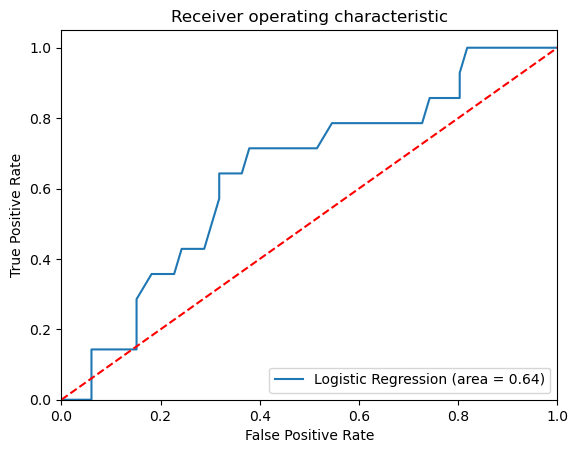

AUC: 0.643


In [35]:
# ROC curve for the test dataset

logit_roc_auc = roc_auc_score(y_test, model.predict(exog = X_test)) # AUC estimatiion
fpr, tpr, thresholds = roc_curve(y_test, model.predict(exog = X_test))  #ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

...
# calculate AUC
auc = roc_auc_score(y_test, model.predict(exog = X_test))
print('AUC: %.3f' % auc)